In [1]:
data <- read.csv("C:\\Users\\LENOVO\\Desktop\\creditcard.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')
table(data$Class)


     0      1 
284315    492 

In [2]:
library(caTools)
set.seed(123)

# Spliting data into training set and test set
split = sample.split(data$Class, SplitRatio = 0.8)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

In [3]:
#sclaing the fields
training_set[-31] = scale(training_set[-31])
test_set[-31] = scale(test_set[-31])
nrow(training_set)
nrow(test_set)

[1] 227846

[1] 56961

In [23]:
# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
# divided the data in 60-40 ratio
library(ROSE)
rose_sample_train_data <- ovun.sample(Class ~ ., data = training_set , method = "over", seed=111)$data
table(rose_sample_train_data$Class)


     0      1 
227452 227490 

In [42]:
log_rose = glm(formula = Class ~ V2+V21+V13+V24+V6, family = binomial, data = rose_sample_train_data)
rose_probability_predict = predict(log_rose, type = 'response', newdata = test_set[-31])

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [47]:
summary(log_rose)


Call:
glm(formula = Class ~ V2 + V21 + V13 + V24 + V6, family = binomial, 
    data = rose_sample_train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8929  -0.7646   0.0040   0.5713   3.0847  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.248081   0.005080 -245.69   <2e-16 ***
V2           0.931697   0.003586  259.85   <2e-16 ***
V21          0.232139   0.002161  107.43   <2e-16 ***
V13         -0.242765   0.003805  -63.80   <2e-16 ***
V24         -0.242379   0.004520  -53.62   <2e-16 ***
V6          -0.884714   0.005010 -176.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 630684  on 454941  degrees of freedom
Residual deviance: 390518  on 454936  degrees of freedom
AIC: 390530

Number of Fisher Scoring iterations: 6


Area under the curve (AUC): 0.849


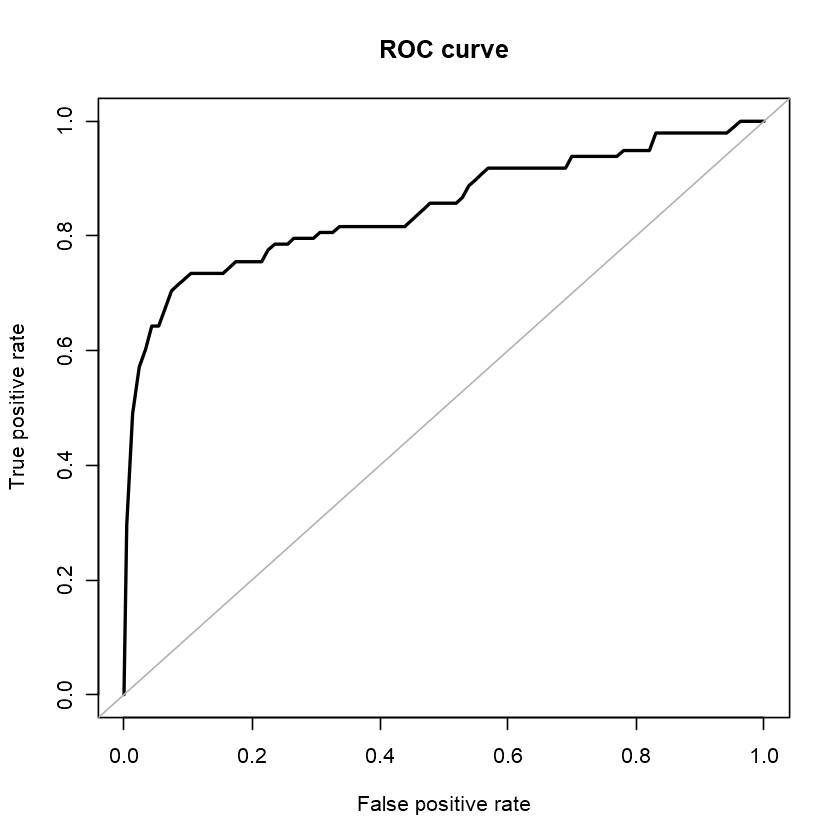

In [43]:
roc_rose <- roc.curve(test_set$Class,rose_probability_predict )
print(roc_rose)

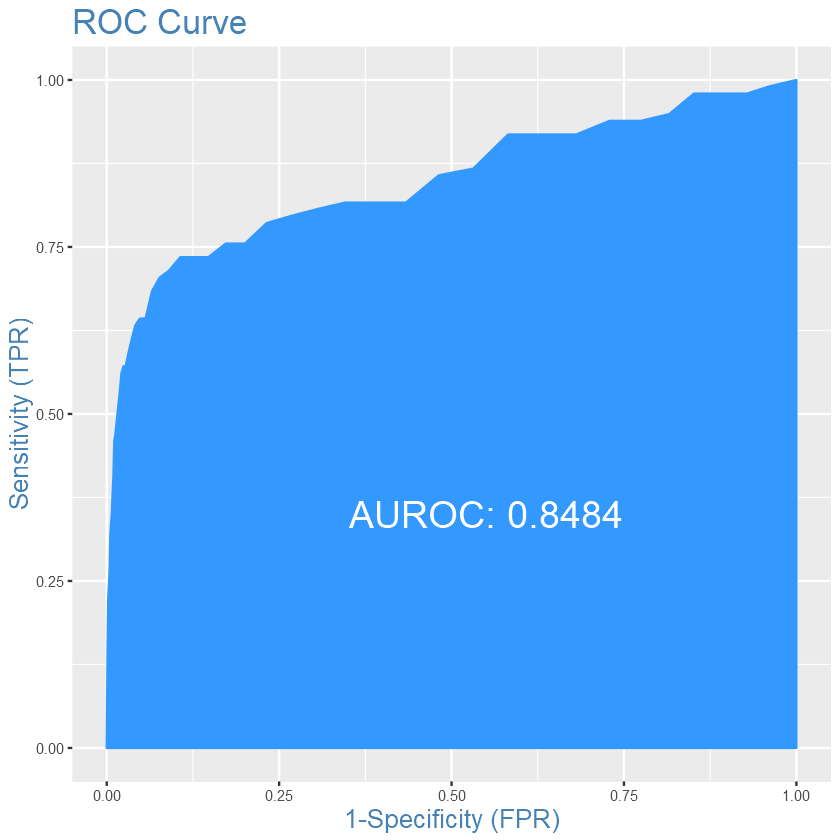

In [44]:
library(InformationValue)
plotROC(test_set, rose_probability_predict)

   
    FALSE  TRUE
  0 56284   579
  1    53    45

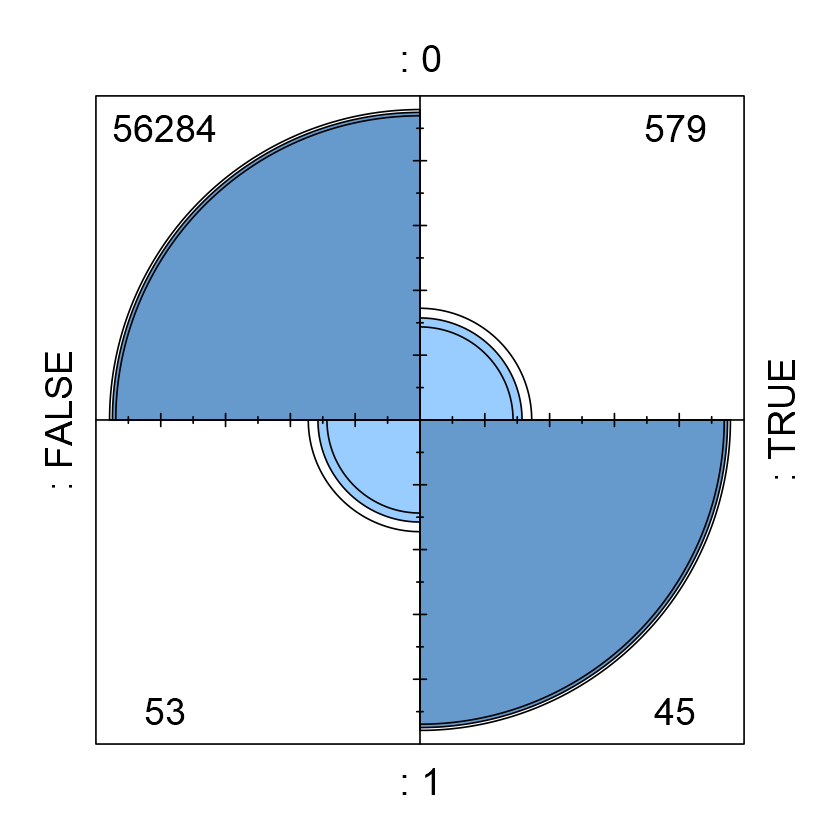

In [45]:
#confusion matrix
table(test_set$Class, rose_probability_predict > 0.8)
fourfoldplot(table(test_set$Class, rose_probability_predict >.8))

In [46]:
sensitivity(test_set$Class, rose_probability_predict, threshold = 0.5)
specificity(test_set$Class, rose_probability_predict, threshold = 0.5)

[1] 0.7142857

[1] 0.9109438